<a href="https://colab.research.google.com/github/milioe/Deep-Learning-TF/blob/main/3_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Redes Neuronales Artificiales con TensorFlow


# Introducción a los tensores
## Índice:
1. Creación de tensores
2. Atributos de tensores
3. Manipulación de tensores
4. Tensores y NumPy
5. `@tf.function`
6. Uso de GPU con TensorFlow
7. Ejercicios

En este notebooks, trabajaremos nuetro primer problema de clasificación. 

El objetivo de este notebook es ir trabajando problemas fáciles, donde la clasificación es extremadamente fácil para nosotros y para la red neuronal, para poder llegar a problemas que sólo se resuelven a través de la no linealidad.

Alguno de los hiperparámetros que usaremos serán:

| Hiperparámetro | Clasificación binaria |  Clasificación multiclass|
|---|---|---|
| Input layer shape |

* Arquitectura de una red neuronal artificial enfocada a clasificación binaria
  * Input y Output shapes
  * Hiperparámetros
    * `Binary_Cross Entropy`
  * Optimizadores
    * Stochastic Gradient Descent
    * Adam
  * Funciones de activación
    * Sigmoide
    * Softmax
  * Epochs
  * Métricas de evaluación
    * Loss / Pérdida
    * Learning Rate
    * Matriz de confusión
  * Corrección de modelos
    * Datos de validación

* Arquitectura de una red neuronal artificial enfocada a clasificación múltiple

In [1]:
# Lo primero que necesitamos hacer es importar tensorflow
import tensorflow as tf

# Datos

Antes de pasar a datasets complicados, necesitamos entrenar un poco con datasets que nosotros fácilmente crearemos. 

Piensa lo siguiente, ¿Cuál es distribución más fácil de clasificar? seguro hay muchas, pero nosotros proponermos lo siguiente
\begin{equation}
f(x) = 
\end{equation}


Por lo tanto, pasemos a código el siguiente problema binario

# Modelo 1

Este primer dataset será sencillo para nuestra red neuronal. Lo único que necesita aprender, es que la línea que divide unos a otros parte de $x=0$. Los datos ya están en nuestro repositorio, lo unico que tenemos que hacer es traerlo con el comando de linux `!wget`

In [6]:
!wget https://raw.githubusercontent.com/milioe/Deep-Learning-TF/main/datasets/redblue100.csv

--2022-08-01 20:19:12--  https://raw.githubusercontent.com/milioe/Deep-Learning-TF/main/datasets/redblue100.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5472 (5.3K) [text/plain]
Saving to: ‘redblue100.csv’

redblue100.csv      100%[===================>]   5.34K  --.-KB/s    in 0s      

2022-08-01 20:19:12 (53.1 MB/s) - ‘redblue100.csv’ saved [5472/5472]



In [7]:
# Importamos pandas y declaramos df_100 como el dataset binario con 100 puntos
import pandas as pd
df_100 = pd.read_csv("redblue100.csv")

In [15]:
# Visualiza las primeras cinco observaciones
df_100.head()

,X0,X1,Label
0,0.195351,0.523404,1
1,-0.521873,0.408261,0
2,0.753059,0.191093,1
3,-0.710660,0.974574,0
4,0.124942,0.450524,1


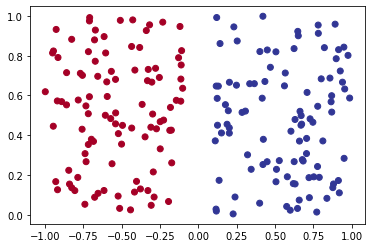

In [14]:
# Imprimir plot de clasificación
import matplotlib.pyplot as plt
plt.scatter(df_100["X0"], df_100["X1"], c=df_100["Label"], cmap=plt.cm.RdYlBu);

In [11]:
# Checar cuántas etiquetas tenemos por cada color
df_100.Label.value_counts()

1    100
0    100
Name: Label, dtype: int64

## Partición de dataset

Observa cómo tenemos conformado nuestro dataset: tenemos dos columnas `X0` y `X1`, los cuales dan la posición `X` y `y` en el plano. Por el otro lado, tenemos la columna `Label`, la cual dice si la observación o fila es **roja** o **azul**, es decir `0` o `1`.

Por lo tanto, necesitamos guardar a nuestras columnas `X0` y `X1` en una variable `X`, y a nuestras etiquetas en una `y`, como se hace en la siguiente celda:

In [16]:
# Guardar variables en X
X = df_100[["X0", "X1"]]
X

,X0,X1
0,0.195351,0.523404
1,-0.521873,0.408261
2,0.753059,0.191093
3,-0.710660,0.974574
4,0.124942,0.450524
...,...,...
195,-0.945288,0.823771
196,-0.920050,0.572626
197,0.651922,0.900130
198,-0.718059,0.508319


In [17]:
# Guardar etiquetas en y
y = df_100["Label"]
y

0      1
1      0
2      1
3      0
4      1
      ..
195    0
196    0
197    1
198    0
199    0
Name: Label, Length: 200, dtype: int64

🔑 **Nota**: Observa cómo para guardar dos columnas, ocupamos doble corchete `[[[]]`, y para guardar una sola columna ocupamos uno `[]`

Ahora que tenemos a `X` y `y`, podemos hacer nuestra partición, ya sea 
* `60/40`
* `70/30`
* `80/20`

Puedes experimentar por tu cuenta con diferentes particiones, nosotros por el momento mantendremos `80/20`. Usaremos el modulo de sci-kit learn `train_test_split`


In [18]:
# importar modulo de sci kit learn
from sklearn.model_selection import train_test_split

Recuerda que debemos de pasar 4 argumentos, porque son 4 particiones. el `test_size` es `0.2`, por lo que el train será nuestro complemento, es decir, el 80%. También pondremos un `seed=42`, para que se pueda reproducir la misma partición en cualquier momento y cualquier lugar. Finalmente, ponemos `shuffle=True` ya que queremos que se barajee el dataset.

In [19]:
# Crear partición
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [21]:
# Checar shape de X, y
X.shape, y.shape

((200, 2), (200,))

In [22]:
# Checar shape de particiones
X_train.shape, X_test.shape

((160, 2), (40, 2))

In [23]:
# Checar shape de particiones
y_train.shape, y_test.shape

((160,), (40,))

In [25]:
# Revisar la primer observación 
X_train.loc[0], y_train[0]

(X0    0.195351
 X1    0.523404
 Name: 0, dtype: float64, 1)

## Pasos para el modelado

Comom habíamos revisado en el notebook anterior de regresión, existen tres principales pasos al momento de modelación, los cuales son:

1. **Crear modelo**: Es aquí donde declararemos la tubería o arquitectura del modelo. Recuerda que AUN NO pasamos los datos, simplemente estamos declarando el cascarón
2. **Compilar modelo**: Aquí se nos piden tres cosas para realizar el backpropagation y la evaluación del modelo:
  * Pérdida
  * Optimizador
  * Métrica
3. **Ajustar modelo**: Finalmente, se le pasan los datos a los pasos previos, y se declaran ciertos hiperparámetros de ajuste.

In [26]:
# CREAR PRIMER MODELO

# 0. random seed
tf.random.set_seed(42)

# 1. crear modelo
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilar modelo
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3 Fit the model
model_1.fit(X_train, y_train, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 7ms/step - loss: 0.9044 - accuracy: 0.5375
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.4529 - accuracy: 0.7375
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.3620 - accuracy: 0.8000
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.3051 - accuracy: 0.8500
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 0.2650 - accuracy: 0.8750
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.8938
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.2093 - accuracy: 0.9312
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.9500
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1813 - accuracy: 0.9750
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.1721 - accuracy: 0.9937


In [27]:
# Evaluamos el modelo en datos que JAMAS ha visto, es decir, el test
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.1751 - accuracy: 1.0000


[0.17506304383277893, 1.0]

Al parecer nuestro modelo ha logrado captar con facilidad el límite, ya que tuvimos un `accuracy` del `100%` en los datos de evaluación.

In [84]:
x_min, x_max = np.array(X).min()- 0.1, np.array(X).max() + 0.1
y_min, y_max = np.array(X).min() - 0.1, np.array(X).max() + 0.1


x_min, x_max, y_min, y_max

(-1.098588447, 1.0982848170000001, -1.098588447, 1.0982848170000001)

In [88]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = np.array(X).min() - 0.1, 1
  y_min, y_max = 0, np.array(X).max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [89]:
def plot_boundaries(model, X_train, y_train, X_test, y_test):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title("Train")
  plot_decision_boundary(model, X=X_train, y=y_train)
  plt.subplot(1, 2, 2)
  plt.title("Test")
  plot_decision_boundary(model, X=X_test, y=y_test)
  plt.show()

doing binary classifcation...
doing binary classifcation...


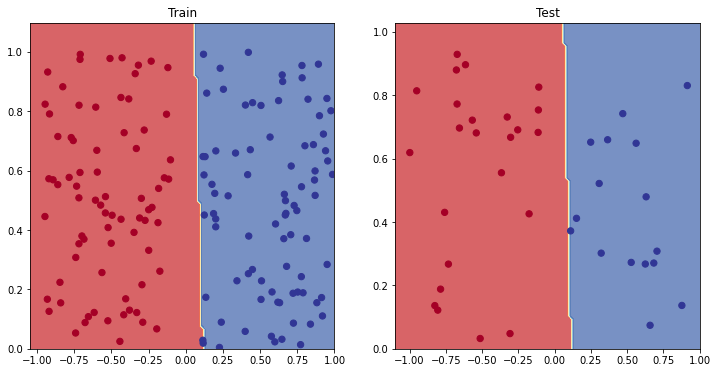

In [90]:
plot_boundaries(model_1, X_train, y_train, X_test, y_test)

# Modelo 2

Ahora cambiaremos de dataset

In [95]:
!wget https://raw.githubusercontent.com/milioe/Deep-Learning-TF/main/datasets/redblue.csv

--2022-08-01 21:32:20--  https://raw.githubusercontent.com/milioe/Deep-Learning-TF/main/datasets/redblue.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10919 (11K) [text/plain]
Saving to: ‘redblue.csv’

redblue.csv         100%[===================>]  10.66K  --.-KB/s    in 0.001s  

2022-08-01 21:32:20 (18.2 MB/s) - ‘redblue.csv’ saved [10919/10919]



In [98]:
# Importamos pandas y declaramos df_100 como el dataset binario con 100 puntos
import pandas as pd
df_rb = pd.read_csv("redblue.csv")

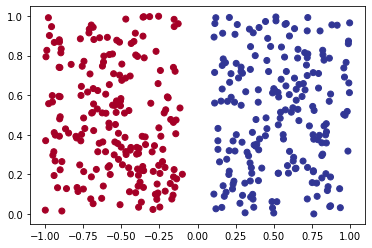

In [99]:
# Imprimir plot de clasificación
import matplotlib.pyplot as plt
plt.scatter(df_rb["X0"], df_rb["X1"], c=df_rb["Label"], cmap=plt.cm.RdYlBu);